In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data from Command: Modern Operations
# see "DB" folder in the game directory
# this data is tied to the game and shouldn't be shared without approval

# this is the Cold-War database
cwdb_connection = sqlite3.connect("/work/CWDB_478.db3")
# this is the modern database
db_connection = sqlite3.connect("/work/DB3K_488.db3")

In [3]:
cwdb_sensor_df = pd.read_sql_query("SELECT * from DataSensor", cwdb_connection)

In [4]:
cwdb_sensor_df.head(n=5)

,ID,Name,Comments,Type,Role,Generation,MasqueradeAs,RangeMin,RangeMax,AltitudeMin,...,MineSweepMinimumDepth,MineSweepMaximumDepth,MineSweepMaximumSpeed,Hypothetical,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar
0,3,Type 87 Scorpion TIR,Bloodhound Mk.2,2001,2201,2005,1001,0.1,100.0,0,...,0,0,0,0,-99.0,0.0,0.0,0.0,0.0,0.0
1,5,AN/ALT-32L,"Low-Band Jamming Set, Phase V ECM",3002,4001,2004,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,AN/ALT-32H,"High-Band Jamming Set, Phase V ECM",3002,4001,2004,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,AN/ALT-16A [AN/ALQ-122 SNOE],"Barrage Jamming System, Phase VI ECM",3002,4021,2006,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,U-2 [IRLS],-,2004,2814,2801,1001,0.0,5.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cwdb_sensortype_df = pd.read_sql_query("SELECT * from EnumSensorType", cwdb_connection)

In [6]:
cwdb_sensortype_df.head(n=10)

,ID,Description
0,1001,None
1,2001,Radar
2,2002,Semi-Active
3,2003,Visual
4,2004,Infrared
5,2005,Track-Via-Missile (TVM)
6,3001,ESM
7,3002,ECM
8,4001,Laser Designator
9,4002,Laser Spot Tracker (LST)


In [7]:
cwdb_sensortype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           35 non-null     int64 
 1   Description  35 non-null     object
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


In [8]:
cwdb_sensorgeneration_df = pd.read_sql_query("SELECT * from EnumSensorGeneration", cwdb_connection)

In [9]:
cwdb_sensorgeneration_df.head(n=10)

,ID,Description
0,1001,None
1,1002,Not Applicable (N/A)
2,2001,Early 1950s
3,2002,Late 1950s
4,2003,Early 1960s
5,2004,Late 1960s
6,2005,Early 1970s
7,2006,Late 1970s
8,2007,Early 1980s
9,2008,Late 1980s


In [10]:
cwdb_sensorgeneration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           32 non-null     int64 
 1   Description  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [11]:
all_radar_df = pd.merge(cwdb_sensor_df, cwdb_sensortype_df, left_on=['Type'], right_on=['ID'], how='left').query('Description == "Radar"').query('Hypothetical != "1"').rename({'Description': 'SensorType'}, axis=1)
all_radar_df = pd.merge(all_radar_df, cwdb_sensorgeneration_df, left_on=['Generation'], right_on=['ID'], how='left').rename({'Description': 'GenerationDescription'}, axis=1)

In [12]:
all_radar_df.head(n=15)

,ID_x,Name,Comments,Type,Role,Generation,MasqueradeAs,RangeMin,RangeMax,AltitudeMin,...,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar,ID_y,SensorType,ID,GenerationDescription
0,3,Type 87 Scorpion TIR,Bloodhound Mk.2,2001,2201,2005,1001,0.1,100.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2005,Early 1970s
1,12,AN/APQ-35,-,2001,2113,2002,1001,0.1,20.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2002,Late 1950s
2,14,Sheet Bend,-,2001,2022,2002,1001,0.1,40.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2002,Late 1950s
3,15,AN/MPQ-54 FAAR,AN/TPQ-32,2001,2005,2005,1001,0.1,8.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2005,Early 1970s
4,16,Decca 626,-,2001,2028,2003,1001,0.2,20.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2003,Early 1960s
5,17,SCR-584,-,2001,2101,2001,1001,0.2,20.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2001,Early 1950s
6,18,AI.18,-,2001,2113,2001,1001,0.1,20.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2001,Early 1950s
7,19,SGR.110,-,2001,2001,2004,1001,0.3,200.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2004,Late 1960s
8,20,AN/FPS-66,-,2001,2001,2004,1001,0.6,230.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2004,Late 1960s
9,22,NRBA-51 TACAN,-,2001,2311,2004,1001,0.2,40.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2004,Late 1960s


In [13]:
all_radar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1185
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_x                                 1186 non-null   int64  
 1   Name                                 1186 non-null   object 
 2   Comments                             1186 non-null   object 
 3   Type                                 1186 non-null   int64  
 4   Role                                 1186 non-null   int64  
 5   Generation                           1186 non-null   int64  
 6   MasqueradeAs                         1186 non-null   int64  
 7   RangeMin                             1186 non-null   float64
 8   RangeMax                             1186 non-null   float64
 9   AltitudeMin                          1186 non-null   int64  
 10  AltitudeMax                          1186 non-null   int64  
 11  AltitudeMin_ASL               

In [14]:
# sanity check, do a lookup on a B52 from circa 1975 and the radar it had
all_radar_df.query('Name == "AN/ASQ-176 OAS"')
# range min and max are in nautial miles (nm)

,ID_x,Name,Comments,Type,Role,Generation,MasqueradeAs,RangeMin,RangeMax,AltitudeMin,...,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar,ID_y,SensorType,ID,GenerationDescription
505,1178,AN/ASQ-176 OAS,-,2001,2123,2003,1001,0.2,40.0,0,...,-99.0,0.0,0.0,0.0,0.0,0.0,2001,Radar,2003,Early 1960s


In [15]:
counts = all_radar_df.groupby('GenerationDescription').size().reset_index(name='counts')
counts

,GenerationDescription,counts
0,Early 1950s,156
1,Early 1960s,198
2,Early 1970s,248
3,Early 1980s,19
4,Early 1990s,2
5,Early 2000s,1
6,Late 1950s,117
7,Late 1960s,207
8,Late 1970s,237
9,Late 1980s,1


Text(0.5, 1.0, 'Max Radar Range By Generation Across Entire Database in Nautical Miles')

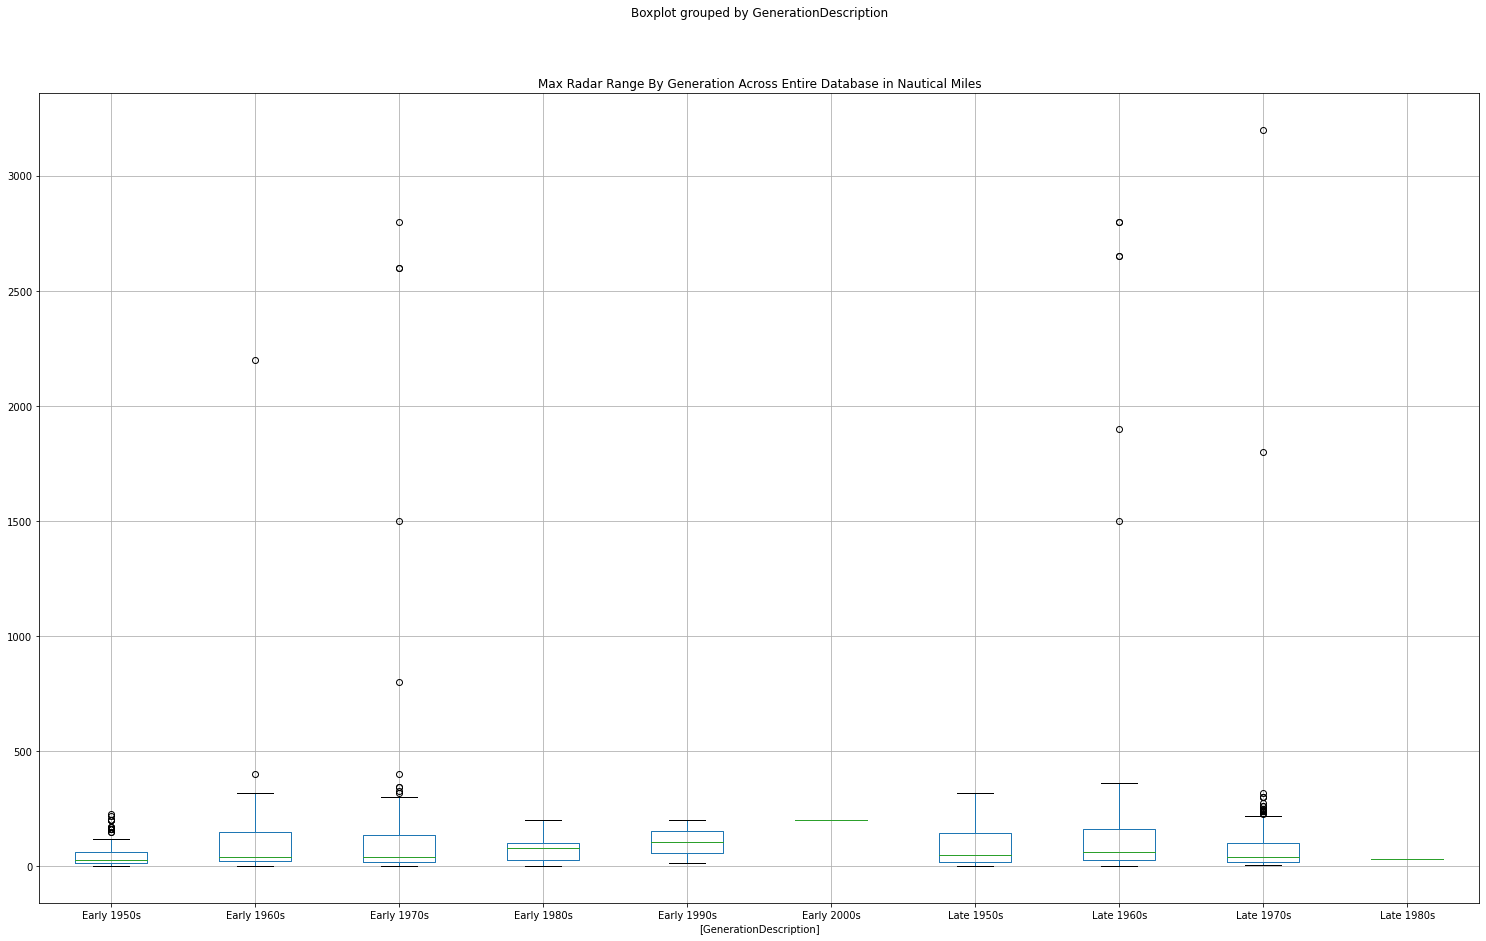

In [16]:
ax = all_radar_df[['GenerationDescription', 'RangeMax']].boxplot(by='GenerationDescription', figsize=(25, 15))
ax.set_title("Max Radar Range By Generation Across Entire Database in Nautical Miles")

In [17]:
cwdb_aircraft_df = pd.read_sql_query("SELECT * from DataAircraft", cwdb_connection)

In [18]:
cwdb_aircraft_df.head(n=5)

,ID,Category,Type,Name,Comments,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,PhysicalSizeCode,RunwayLengthCode,Hypothetical,Cost,DamagePoints,AircraftEngineArmor,AircraftFuselageArmor,AircraftCockpitArmor,Visibility,FuelOffloadRate
0,3,2002,3001,Barracuda TB. Mk.2,-,2100,2102,1944,1954,12.1,...,2002,2003,0,0,5.0,1001,1001,1001,"B,B,B",0
1,4,2001,3001,Canberra B(I).58,-,2041,2001,1957,0,20.0,...,2003,2004,0,0,10.0,1001,1001,1001,"B,B,C",0
2,5,2001,2001,CL-13 Sabre Mk.4,-,2016,2001,1952,1953,11.3,...,2001,2004,0,0,3.0,1001,1001,1001,"B,A,C",0
3,6,2002,2001,Sea Venom FAW.22,-,2006,2002,1957,1967,9.7,...,2001,2004,0,0,3.0,1001,1001,1001,"B,A,C",0
4,7,2001,2001,F-101A Voodoo,-,2101,2001,1957,1965,21.6,...,2003,2004,0,0,10.0,1001,1001,1001,"B,B,C",0


In [19]:
cwdb_operators_df = pd.read_sql_query("SELECT * from EnumOperatorCountry", cwdb_connection)

In [20]:
cwdb_operators_df.head(n=5)

,ID,Description,YearStart,YearEnd
0,1001,None,0.0,0.0
1,1002,Unknown,0.0,0.0
2,1003,Generic,0.0,0.0
3,1101,Civilian,0.0,0.0
4,1102,Commercial,0.0,0.0


In [21]:
cwdb_allaircraft_df = pd.merge(cwdb_aircraft_df, cwdb_operators_df, left_on=['OperatorCountry'], right_on=['ID'], how='left').query('Hypothetical != "1"').rename({'Description': 'OperatorCountryName'}, axis=1)
cwdb_allaircraft_df.drop(['ID_y'], axis=1, inplace=True)
cwdb_allaircraft_df.rename(columns={"ID_x": "ID"}, inplace=True)

In [22]:
cwdb_allaircraft_df.head(n=10)

,ID,Category,Type,Name,Comments,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,Cost,DamagePoints,AircraftEngineArmor,AircraftFuselageArmor,AircraftCockpitArmor,Visibility,FuelOffloadRate,OperatorCountryName,YearStart,YearEnd
0,3,2002,3001,Barracuda TB. Mk.2,-,2100,2102,1944,1954,12.1,...,0,5.0,1001,1001,1001,"B,B,B",0,United Kingdom,0.0,0.0
1,4,2001,3001,Canberra B(I).58,-,2041,2001,1957,0,20.0,...,0,10.0,1001,1001,1001,"B,B,C",0,India,0.0,0.0
2,5,2001,2001,CL-13 Sabre Mk.4,-,2016,2001,1952,1953,11.3,...,0,3.0,1001,1001,1001,"B,A,C",0,Canada,0.0,0.0
3,6,2002,2001,Sea Venom FAW.22,-,2006,2002,1957,1967,9.7,...,0,3.0,1001,1001,1001,"B,A,C",0,Australia,0.0,0.0
4,7,2001,2001,F-101A Voodoo,-,2101,2001,1957,1965,21.6,...,0,10.0,1001,1001,1001,"B,B,C",0,United States,0.0,0.0
5,8,2003,6001,Wessex HAS.3,-,2100,2102,1972,1975,12.0,...,0,5.0,1001,1001,1001,"B,C,C",0,United Kingdom,0.0,0.0
6,9,2002,6001,Firefly AS.Mk.6,-,2100,2102,1950,1956,8.5,...,0,3.0,1001,1001,1001,"B,A,C",0,United Kingdom,0.0,0.0
7,10,2001,6001,CP-107 Argus Mk1,-,2016,2001,1967,0,39.9,...,0,10.0,1001,1001,1001,"B,C,C",0,Canada,0.0,0.0
8,11,2003,7101,CH-37C (HR2S-1) Mojave,-,2101,2003,1956,0,15.5,...,0,5.0,1001,1001,1001,"A,B,C",0,United States,0.0,0.0
9,12,2002,2001,F2H-3 Banshee,-,2016,2002,1955,1962,14.6,...,0,5.0,1001,1001,1001,"A,A,A",0,Canada,0.0,0.0


In [23]:
# tie planes and radar together
cwdb_aircraftsensors_df = pd.read_sql_query("SELECT * from DataAircraftSensors", cwdb_connection)
cwdb_aircraftsensors_df.head(n=5)

,ID,ComponentNumber,ComponentID,SB1,SB2,SMF1,SMF2,SMA1,SMA2,SS1,...,SS1Max,SS2Max,PB1Max,PB2Max,PMF1Max,PMF2Max,PMA1Max,PMA2Max,PS1Max,PS2Max
0,4,1,257,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,4,3,292,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,6,2,309,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,7,1,402,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,7,3,281,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,1


In [24]:
cwdb_aircraftsensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               6888 non-null   int64
 1   ComponentNumber  6888 non-null   int64
 2   ComponentID      6888 non-null   int64
 3   SB1              6888 non-null   int64
 4   SB2              6888 non-null   int64
 5   SMF1             6888 non-null   int64
 6   SMF2             6888 non-null   int64
 7   SMA1             6888 non-null   int64
 8   SMA2             6888 non-null   int64
 9   SS1              6888 non-null   int64
 10  SS2              6888 non-null   int64
 11  PB1              6888 non-null   int64
 12  PB2              6888 non-null   int64
 13  PMF1             6888 non-null   int64
 14  PMF2             6888 non-null   int64
 15  PMA1             6888 non-null   int64
 16  PMA2             6888 non-null   int64
 17  PS1              6888 non-null   int64
 18  PS2     

In [25]:
cwdb_allaircraft_sensors_df = pd.merge(cwdb_allaircraft_df, cwdb_aircraftsensors_df, left_on=['ID'], right_on=['ID'], how='left').rename({'Description': 'OperatorCountryName'}, axis=1)

In [26]:
# our B-52H from 1975 has 12 different sensor platforms which matches the game
cwdb_allaircraft_sensors_df.query("ID == 2777")

,ID,Category,Type,Name,Comments,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,SS1Max,SS2Max,PB1Max,PB2Max,PMF1Max,PMF2Max,PMA1Max,PMA2Max,PS1Max,PS2Max
5231,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5232,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5233,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5234,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5235,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5236,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5237,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5238,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5239,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [27]:
cwdb_allaircraft_sensors_df = pd.merge(cwdb_allaircraft_sensors_df, cwdb_sensor_df, left_on=['ComponentID'], right_on=['ID'], how='left').rename({'Description': 'OperatorCountryName'}, axis=1)
cwdb_allaircraft_sensors_df.drop(['ID_y'], axis=1, inplace=True)
cwdb_allaircraft_sensors_df.rename(columns={"ID_x": "ID"}, inplace=True)

In [28]:
cwdb_allaircraft_sensors_df.head(n=5)

,ID,Category,Type_x,Name_x,Comments_x,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,MineSweepMinimumDepth,MineSweepMaximumDepth,MineSweepMaximumSpeed,Hypothetical_y,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar
0,3,2002,3001,Barracuda TB. Mk.2,-,2100,2102,1944,1954,12.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2001,3001,Canberra B(I).58,-,2041,2001,1957,0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2001,3001,Canberra B(I).58,-,2041,2001,1957,0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2001,2001,CL-13 Sabre Mk.4,-,2016,2001,1952,1953,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,2002,2001,Sea Venom FAW.22,-,2006,2002,1957,1967,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
cwdb_allaircraft_sensors_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 0 to 8238
Data columns (total 145 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    ID                                   int64  
 1    Category                             int64  
 2    Type_x                               int64  
 3    Name_x                               object 
 4    Comments_x                           object 
 5    OperatorCountry                      int64  
 6    OperatorService                      int64  
 7    YearCommissioned                     int64  
 8    YearDecommissioned                   int64  
 9    Length                               float64
 10   Span                                 float64
 11   Height                               float64
 12   WeightEmpty                          int64  
 13   WeightMax                            int64  
 14   WeightPayload                        int64  
 15   Crew               

In [30]:
cwdb_allaircraft_sensors_df = pd.merge(cwdb_allaircraft_sensors_df, cwdb_sensortype_df, left_on=['Type_x'], right_on=['ID'], how='left').rename({'Description': 'SensorType'}, axis=1)
cwdb_allaircraft_sensors_df.drop(['ID_y'], axis=1, inplace=True)
cwdb_allaircraft_sensors_df.rename(columns={"ID_x": "ID"}, inplace=True)

In [31]:
cwdb_sensors_df = pd.read_sql_query("SELECT * from DataSensor", cwdb_connection)

cwdb_sensors_df.head(n=5)

,ID,Name,Comments,Type,Role,Generation,MasqueradeAs,RangeMin,RangeMax,AltitudeMin,...,MineSweepMinimumDepth,MineSweepMaximumDepth,MineSweepMaximumSpeed,Hypothetical,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar
0,3,Type 87 Scorpion TIR,Bloodhound Mk.2,2001,2201,2005,1001,0.1,100.0,0,...,0,0,0,0,-99.0,0.0,0.0,0.0,0.0,0.0
1,5,AN/ALT-32L,"Low-Band Jamming Set, Phase V ECM",3002,4001,2004,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,AN/ALT-32H,"High-Band Jamming Set, Phase V ECM",3002,4001,2004,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,AN/ALT-16A [AN/ALQ-122 SNOE],"Barrage Jamming System, Phase VI ECM",3002,4021,2006,1001,0.0,0.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,U-2 [IRLS],-,2004,2814,2801,1001,0.0,5.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
cwdb_allaircraft_sensors_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 0 to 8238
Data columns (total 146 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    ID                                   8239 non-null   int64  
 1    Category                             8239 non-null   int64  
 2    Type_x                               8239 non-null   int64  
 3    Name_x                               8239 non-null   object 
 4    Comments_x                           8239 non-null   object 
 5    OperatorCountry                      8239 non-null   int64  
 6    OperatorService                      8239 non-null   int64  
 7    YearCommissioned                     8239 non-null   int64  
 8    YearDecommissioned                   8239 non-null   int64  
 9    Length                               8239 non-null   float64
 10   Span                                 8239 non-null   float64
 11   Height         

In [33]:
# our B-52H from 1975
cwdb_allaircraft_sensors_df.query("ID == 2777")

,ID,Category,Type_x,Name_x,Comments_x,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,MineSweepMaximumDepth,MineSweepMaximumSpeed,Hypothetical_y,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar,SensorType
5231,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,0.0,NaN
5232,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5233,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5234,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5235,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5236,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5237,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5238,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5239,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5240,2777,2001,3101,B-52H Stratofortress,-,2101,2001,1975,0,48.5,...,0.0,0.0,0.0,-99.0,0.0,0.0,0.0,0.0,0.0,NaN


In [34]:
soviet_and_us_planes_sensors_df = cwdb_allaircraft_sensors_df.query('OperatorCountryName.str.startswith("United States") or OperatorCountryName.str.startswith("Soviet")', engine='python')

In [35]:
soviet_and_us_planes_sensors_df

,ID,Category,Type_x,Name_x,Comments_x,OperatorCountry,OperatorService,YearCommissioned,YearDecommissioned,Length,...,MineSweepMaximumDepth,MineSweepMaximumSpeed,Hypothetical_y,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar,SensorType
5,7,2001,2001,F-101A Voodoo,-,2101,2001,1957,1965,21.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar
6,7,2001,2001,F-101A Voodoo,-,2101,2001,1957,1965,21.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar
15,11,2003,7101,CH-37C (HR2S-1) Mojave,-,2101,2003,1956,0,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,16,2003,7101,CH-34B (H-34B) Choctaw,-,2101,2003,1954,1962,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,17,2003,7101,UH-1E Huey,Bell 205A-1,2101,2009,1965,0,12.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,4069,2002,4001,EA-6B Prowler,-,2101,2009,1971,0,18.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laser Designator
8235,4069,2002,4001,EA-6B Prowler,-,2101,2009,1971,0,18.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laser Designator
8236,4069,2002,4001,EA-6B Prowler,-,2101,2009,1971,0,18.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laser Designator
8237,4069,2002,4001,EA-6B Prowler,-,2101,2009,1971,0,18.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laser Designator


In [36]:
soviet_and_us_planes_sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 5 to 8238
Columns: 146 entries, ID to SensorType
dtypes: float64(116), int64(23), object(7)
memory usage: 4.8+ MB


In [37]:
# filter out all the planes that don't have sensors with a range value
soviet_and_us_planes_sensors_df = soviet_and_us_planes_sensors_df[soviet_and_us_planes_sensors_df['RangeMax'].notnull()]

In [38]:
soviet_and_us_planes_sensors_df.groupby('YearCommissioned')['YearCommissioned'].count()

YearCommissioned
0         24
1929       1
1940       3
1941       7
1942       5
1943       9
1944      18
1945       3
1946       9
1947      21
1948      17
1949      26
1950     115
1951      42
1952      23
1953     111
1954      49
1955      82
1956     145
1957     148
1958     115
1959      66
1960      40
1961      90
1962     102
1963     205
1964      63
1965     132
1966     181
1967     330
1968     217
1969     211
1970     219
1971     102
1972     365
1973      69
1974      82
1975     225
1976      72
1977      55
1978      82
1979      75
1980       9
1981       3
19732      5
Name: YearCommissioned, dtype: int64

In [39]:
soviet_and_us_planes_sensors_df.groupby('YearDecommissioned')['YearDecommissioned'].count()

YearDecommissioned
0       1964
1946       1
1948       2
1950       4
1952       1
1953      16
1954       8
1955      12
1956      10
1957      55
1958      18
1959      54
1960      62
1961      61
1962     167
1964     101
1965      93
1966      78
1967     119
1968      63
1969     116
1970      87
1971      52
1972     118
1973      37
1974      68
1975     102
1976      30
1977      31
1978      32
1979      31
1980      12
1981      17
1982      27
1983       8
1984      18
1985      18
1986      26
1987       2
1988       3
1989      10
1990       2
1991     177
1993      22
1995      24
1997       5
2005       1
2010       2
2014       1
2015       4
2016       1
Name: YearDecommissioned, dtype: int64

In [40]:
soviet_and_us_planes_sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3973 entries, 5 to 8238
Columns: 146 entries, ID to SensorType
dtypes: float64(116), int64(23), object(7)
memory usage: 4.5+ MB


Text(0.5, 1.0, 'US Airplane Radar Max Range Changes Over Time Based on Plane Commission Year')

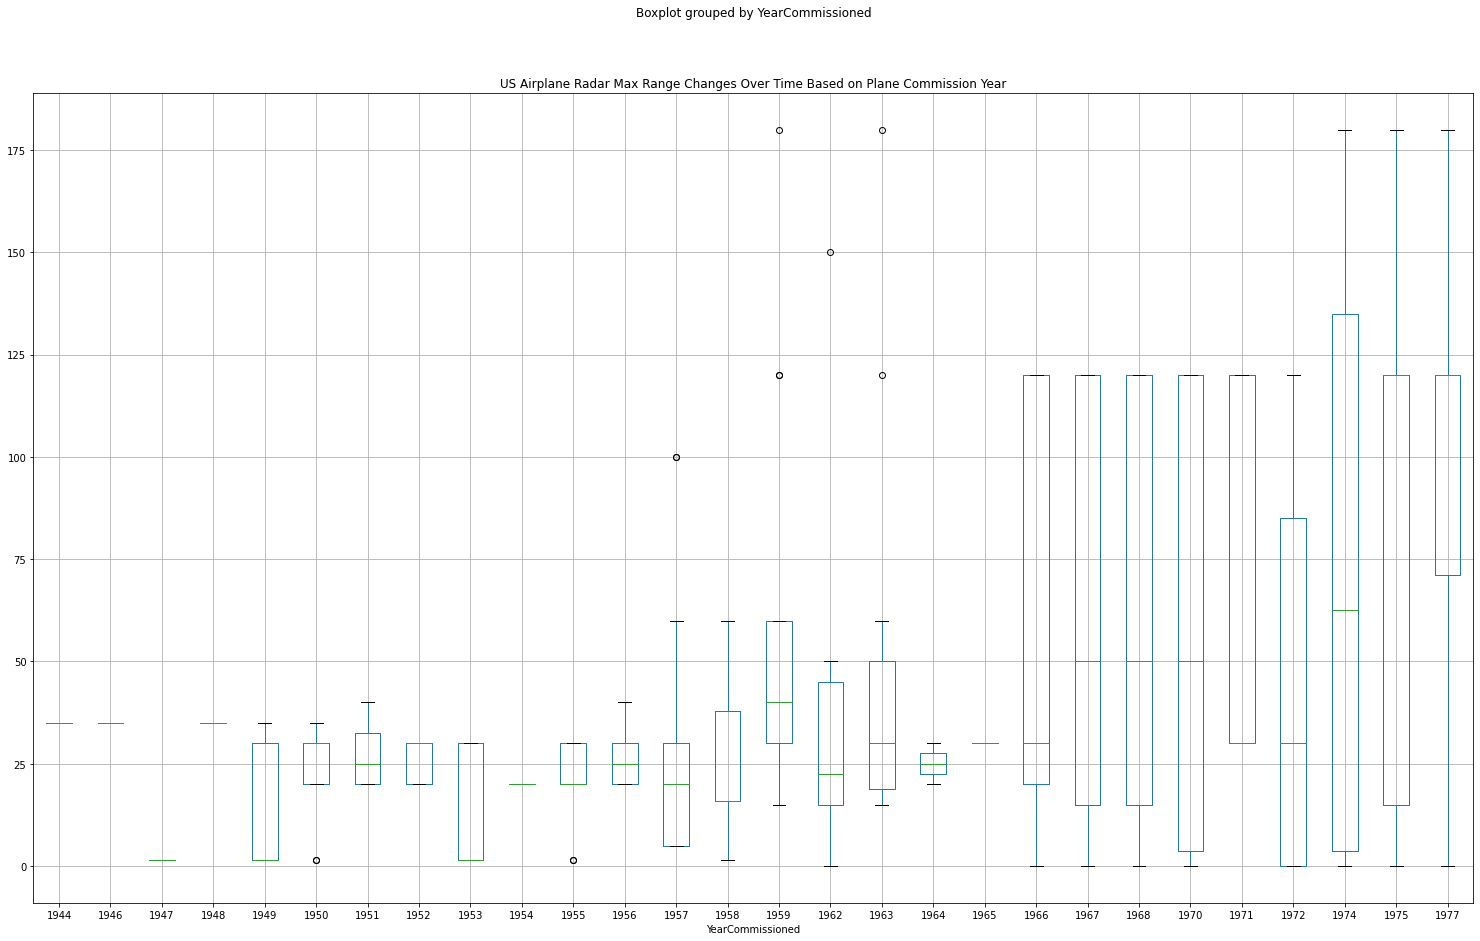

In [41]:
ax = soviet_and_us_planes_sensors_df.query('OperatorCountryName.str.startswith("United States")', engine='python').query('SensorType == "Radar"').boxplot(column='RangeMax', by='YearCommissioned', figsize=(25, 15))
ax.set_title("US Airplane Radar Max Range Changes Over Time Based on Plane Commission Year")

Text(0.5, 1.0, 'Soviet Airplane Radar Max Range Changes Over Time Based on Plane Commission Year')

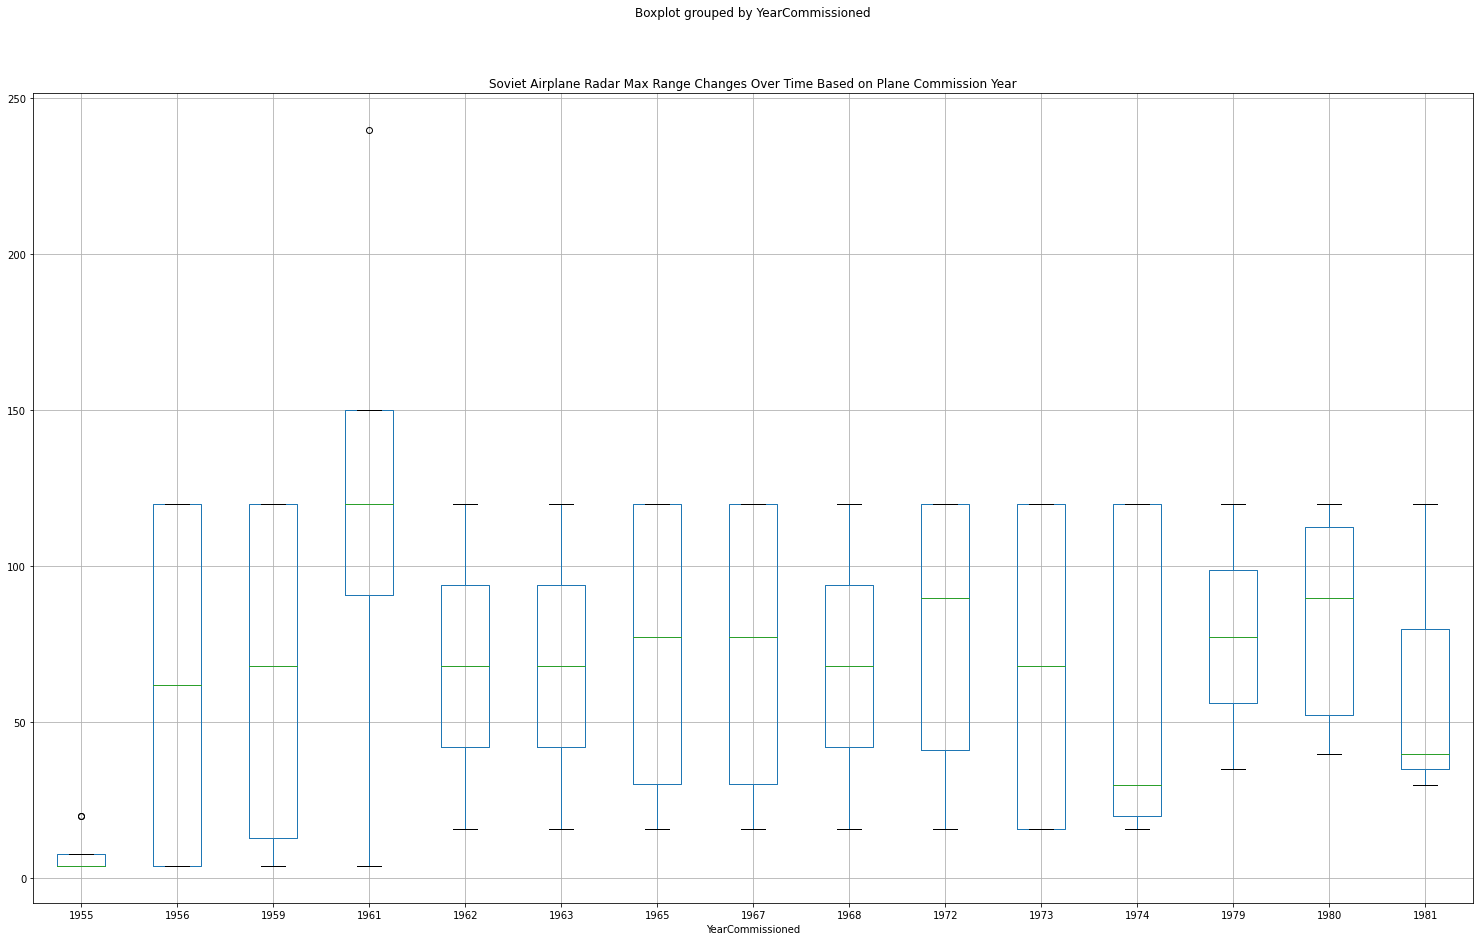

In [42]:
ax = soviet_and_us_planes_sensors_df.query('OperatorCountryName.str.startswith("Soviet")', engine='python').query('SensorType == "Radar"').boxplot(column='RangeMax', by='YearCommissioned', figsize=(25, 15))
ax.set_title("Soviet Airplane Radar Max Range Changes Over Time Based on Plane Commission Year")

## This is just based off the commision year though, what if we expand out the lifespan of the plane from the commission year through to decommissioning to see what each country was fielding every year?

In [43]:
# filter out where we don't have commission information
# there are a lot of Soviet planes that don't have a decommissioned year, this is unfortunate and excludes a LOT of data
soviet_and_us_planes_sensors_df = soviet_and_us_planes_sensors_df.query('YearCommissioned >= 1900 & YearCommissioned <= 2030')
soviet_and_us_planes_sensors_df = soviet_and_us_planes_sensors_df.query('YearDecommissioned >= 1900 & YearDecommissioned <= 2030')

In [44]:
soviet_and_us_planes_sensors_df['CommissionDateRange'] = [pd.date_range(s, e, freq='YS') for s, e in
              zip(pd.to_datetime(soviet_and_us_planes_sensors_df['YearCommissioned'], format='%Y'), pd.to_datetime(soviet_and_us_planes_sensors_df['YearDecommissioned'], format='%Y'))]

In [45]:
soviet_and_us_planes_sensors_df = soviet_and_us_planes_sensors_df.explode('CommissionDateRange').drop(['YearCommissioned', 'YearDecommissioned'], axis=1)
# add column as just integer type
soviet_and_us_planes_sensors_df['CommissionDateRangeYearInteger'] = soviet_and_us_planes_sensors_df['CommissionDateRange'].dt.year
soviet_and_us_planes_sensors_df

,ID,Category,Type_x,Name_x,Comments_x,OperatorCountry,OperatorService,Length,Span,Height,...,Hypothetical_y,MinimumSignature_Radar,MinimumSignature_Visual,MinimumSignature_IR,MinimumSignature_ESM,MinimumSignature_ActiveSonar,MinimumSignature_PassiveSonar,SensorType,CommissionDateRange,CommissionDateRangeYearInteger
5,7,2001,2001,F-101A Voodoo,-,2101,2001,21.6,11.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar,1957-01-01,1957
5,7,2001,2001,F-101A Voodoo,-,2101,2001,21.6,11.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar,1958-01-01,1958
5,7,2001,2001,F-101A Voodoo,-,2101,2001,21.6,11.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar,1959-01-01,1959
5,7,2001,2001,F-101A Voodoo,-,2101,2001,21.6,11.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar,1960-01-01,1960
5,7,2001,2001,F-101A Voodoo,-,2101,2001,21.6,11.7,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Radar,1961-01-01,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,4061,2002,3001,A-6A Intruder,-,2101,2009,16.7,16.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESM,1964-01-01,1964
8176,4061,2002,3001,A-6A Intruder,-,2101,2009,16.7,16.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESM,1965-01-01,1965
8177,4061,2002,3001,A-6A Intruder,-,2101,2009,16.7,16.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESM,1963-01-01,1963
8177,4061,2002,3001,A-6A Intruder,-,2101,2009,16.7,16.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESM,1964-01-01,1964


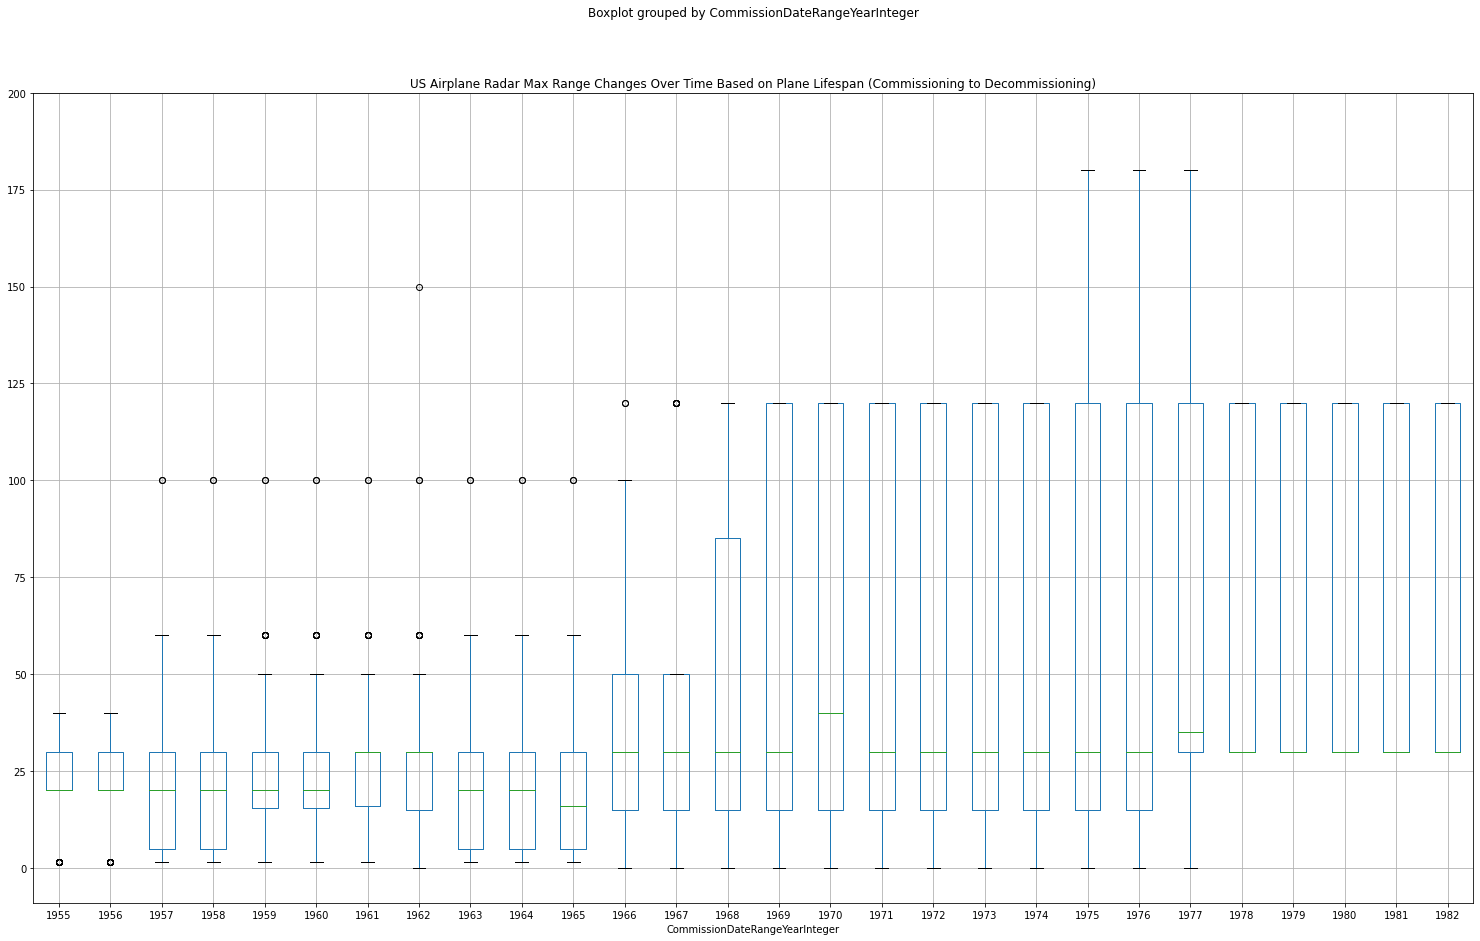

In [46]:
ax = soviet_and_us_planes_sensors_df.query('OperatorCountryName.str.startswith("United States")', engine='python').query('SensorType == "Radar" & CommissionDateRangeYearInteger >= 1955 & CommissionDateRangeYearInteger <= 1982').boxplot(column='RangeMax', by='CommissionDateRangeYearInteger', figsize=(25, 15))
ax.set_title("US Airplane Radar Max Range Changes Over Time Based on Plane Lifespan (Commissioning to Decommissioning)")
ax.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200])

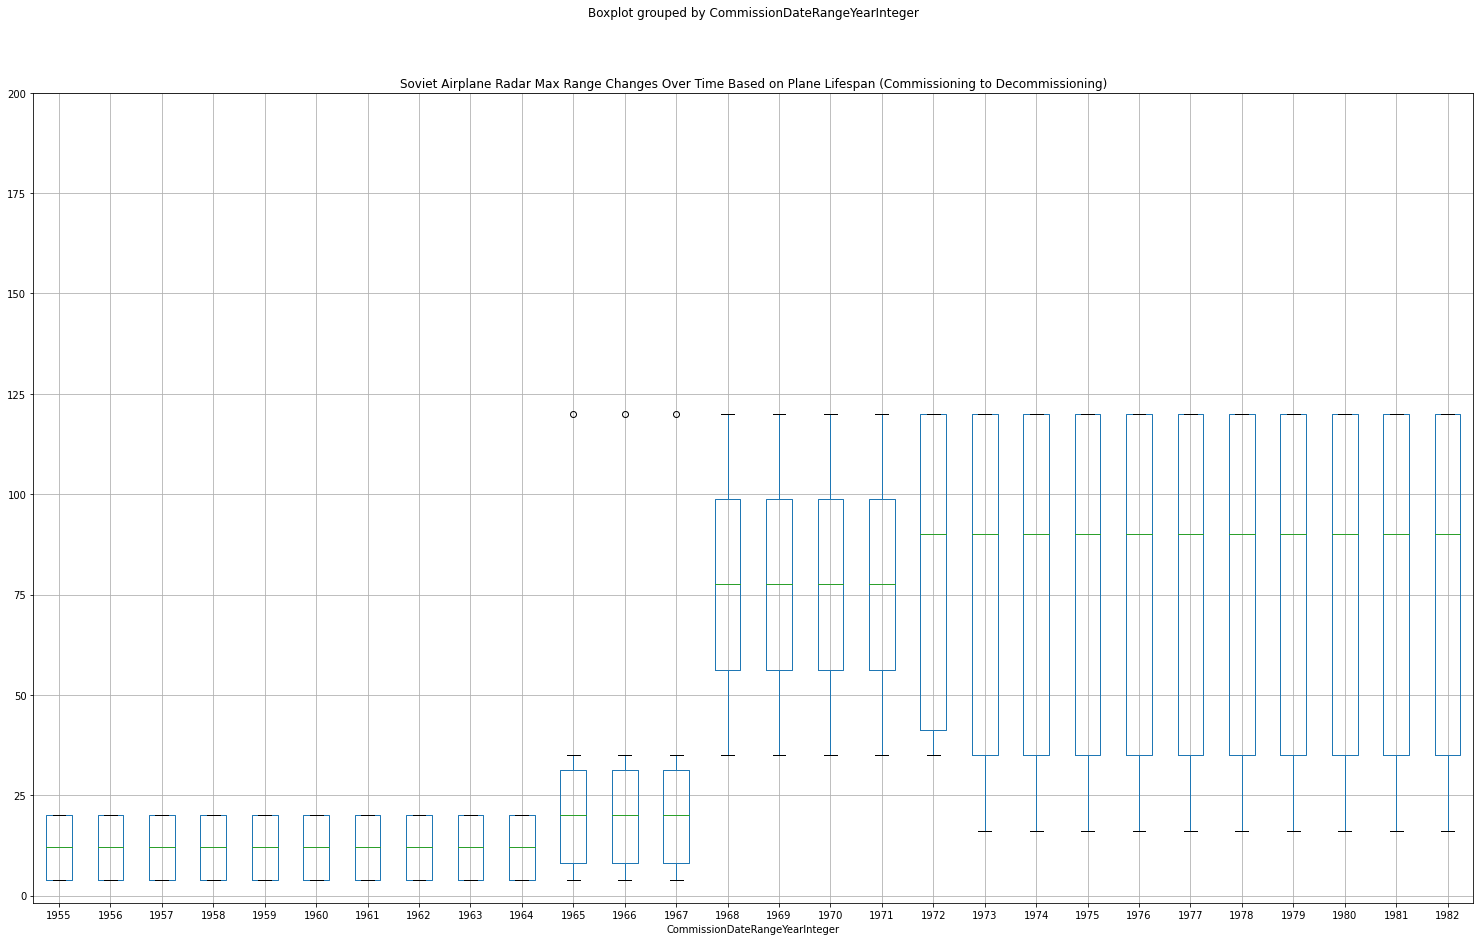

In [47]:
ax = soviet_and_us_planes_sensors_df.query('OperatorCountryName.str.startswith("Soviet")', engine='python').query('SensorType == "Radar" & CommissionDateRangeYearInteger >= 1955 & CommissionDateRangeYearInteger <= 1982').boxplot(column='RangeMax', by='CommissionDateRangeYearInteger', figsize=(25, 15))
ax.set_title("Soviet Airplane Radar Max Range Changes Over Time Based on Plane Lifespan (Commissioning to Decommissioning)")
ax.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200])